# MoneyLion Assessment

After exploring and understanding the datasets, let's get started!

In [ ]:
import numpy as np
import pandas as pd

loanDF = pd.read_csv("~\Desktop\MoneyLion\data\loan.csv")
paymentDF = pd.read_csv("~\Desktop\MoneyLion\data\payment.csv")
clarityDF = pd.read_csv("~\Desktop\MoneyLion\data\clarity_underwriting_variables.csv")

In [2]:
loanDF.dtypes

loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

In [3]:
paymentDF.dtypes

loanId                object
installmentIndex       int64
isCollection            bool
paymentDate           object
principal            float64
fees                 float64
paymentAmount        float64
paymentStatus         object
paymentReturnCode     object
dtype: object

In [4]:
clarityDF.dtypes

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                    float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                               float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                     float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                       float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                    float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                     float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                    float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                   float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                            float64
.

First, we inner join the loan data with the clear fraud data because I think that we should train the data using already scored data.

In [5]:
#rename the clear fraud id to be same for loan and underwriting data first
clarityDF.rename(columns={'underwritingid':'clarityFraudId'}, inplace=True)

loanCF = loanDF.merge(clarityDF[['clearfraudscore', 'clarityFraudId']], on='clarityFraudId', how='inner')
display(loanCF)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.00,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,879.0
1,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.00,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,New Loan,400.0,1364.87,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1,658.0
2,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
3,LL-I-17491287,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-02-21T17:20:23.671000,True,2017-02-21T17:45:11.088000,3.0,True,1,Paid Off Loan,1250.0,3112.16,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
4,LL-I-15679301,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-01-18T01:16:24.941000,True,2017-01-18T01:30:16.712000,1.0,True,1,Paid Off Loan,500.0,1292.09,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
5,LL-I-12500318,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2016-12-05T06:19:59.756000,True,2016-12-05T06:45:04.331000,0.0,True,1,Paid Off Loan,500.0,1271.81,MO,bvMandatory,6,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
6,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.00,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,624.0
7,LL-I-18309774,10cefd11d41612b032fd9cd2debe32dc,B,159.00,2017-03-13T03:55:39.599000,True,2017-03-13T21:15:16.293000,1.0,True,1,New Loan,2600.0,8116.01,CA,organic,0,Checked,578f9346e4b0810ad5e7b72e,1,624.0
8,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.10,2016-05-25T03:05:18.849000,True,2016-05-25T15:11:36.260000,3.0,True,1,Paid Off Loan,300.0,422.64,WI,organic,0,Checked,56621584e4b0100e84141586,1,770.0
9,LL-I-10219067,1d249e27292d25e4d3b4bc142a2a4aea,W,381.65,2016-07-08T16:31:13.341000,True,2016-07-08T21:28:07.169000,4.0,True,1,Paid Off Loan,350.0,492.90,WI,organic,0,Checked,56621584e4b0100e84141586,1,770.0


It seems like we have quite a number of data with clear fraud ID but not found in clear fraud data, I seem to notice it is either with "Rejected" or "Withdrawn Application" status. Let's find out.

In [6]:
#Check for null values
display(loanCF[(loanCF['hasCF'].isnull())].size)

#Testing if hasCF = 0 is merged, as applicant with no CF should not be in this temporary dataset
display(loanCF[(loanCF['hasCF'] == 0)].size)


0

0

In [7]:
#Test if there is any null values
temp = loanCF[(loanCF['clearfraudscore']).isnull()]
display(temp)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
561,LL-I-12401151,771c037cf803d3485e596292650803a8,B,449.990,2016-12-02T15:02:41.712000,True,2016-12-02T21:17:22.833000,1.0,True,1,New Loan,400.0,994.74,WI,organic,0,Checked,57e3e8fde4b0f226b71a4477,1,NaN
562,LL-I-12080201,771c037cf803d3485e596292650803a8,B,449.990,2016-09-21T23:08:40.866000,False,NaN,1.0,False,0,Withdrawn Application,600.0,1111.76,WI,organic,0,NaN,57e3e8fde4b0f226b71a4477,1,NaN
753,LL-I-03919548,83a8289628e43f6af3f9479152458ee2,W,449.990,2015-10-19T13:39:47.872000,False,NaN,1.0,False,0,Rejected,300.0,440.88,NaN,organic,0,NaN,5625017ce4b02f6d960a1c6e,1,NaN
754,LL-I-03944975,83a8289628e43f6af3f9479152458ee2,B,449.990,2015-10-20T13:38:57.696000,True,2015-10-20T15:54:00.439000,1.0,True,1,Paid Off Loan,375.0,773.42,WI,organic,0,Checked,5625017ce4b02f6d960a1c6e,1,NaN
755,LL-I-07558103,83a8289628e43f6af3f9479152458ee2,B,449.990,2016-03-02T04:37:21.528000,True,2016-03-02T15:05:06.829000,2.0,True,1,Paid Off Loan,800.0,1359.82,WI,organic,0,Checked,5625017ce4b02f6d960a1c6e,1,NaN
756,LL-I-03926625,83a8289628e43f6af3f9479152458ee2,W,449.990,2015-10-19T17:01:49.734000,False,NaN,1.0,False,0,Rejected,300.0,440.88,WI,organic,0,NaN,5625017ce4b02f6d960a1c6e,1,NaN
757,LL-I-09060356,83a8289628e43f6af3f9479152458ee2,B,404.991,2016-05-12T20:16:54.297000,False,NaN,3.0,False,0,Withdrawn Application,800.0,1200.36,WI,organic,0,NaN,5625017ce4b02f6d960a1c6e,1,NaN
1859,LL-I-12539473,f530f55e3ae6aca5951bc0123b016822,B,390.000,2016-12-05T20:34:58.623000,True,2016-12-13T16:13:23.021000,3.0,True,1,Paid Off Loan,625.0,1384.96,PA,prescreen,0,Checked,5845cf72e4b0bb9d6ea2f08c,1,NaN
2038,LL-I-10388447,4e62fbf2a33a94185b61f7a90d1efef8,B,490.000,2016-07-20T20:29:59.160000,False,NaN,1.0,False,0,Withdrawn Application,750.0,1911.77,MO,organic,0,NaN,5743b3bde4b0d2e97c14e3bb,1,NaN
2039,LL-I-09250840,4e62fbf2a33a94185b61f7a90d1efef8,B,490.000,2016-05-24T01:42:01.857000,True,2016-05-25T20:22:48.271000,0.0,True,1,Paid Off Loan,700.0,1784.57,MO,bvMandatory,3,Checked,5743b3bde4b0d2e97c14e3bb,1,NaN


In [8]:
print(temp.iloc[:,0].size)
print(loanCF.iloc[:,0].size)
print(temp.iloc[:,0].size/loanCF.iloc[:,0].size * 100)

109
36334
0.29999449551384383


There seems to be some weird data that has clear fraud ID but not score, but it is only 0.3% of the dataset and we need the score for training the dataset so we set the data without score aside for now.

In [9]:
loanCF = loanCF[(loanCF['clearfraudscore'].notnull())]
print(loanCF.iloc[:,0].size)

#Double confirm
temp = loanCF[(loanCF['clearfraudscore']).isnull()]
display(temp)

36225


,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore


In [10]:
temp = loanCF[(loanCF['loanStatus'] == "Withdrawn Application") | (loanCF['loanStatus'] == "Rejected")]
display(temp)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
19,LL-I-08481484,feb7fad96c04b2eae8caadbca52c8cf6,I,490.00,2016-04-06T23:56:04.785000,False,NaN,1.0,False,0,Rejected,1500.0,4102.01,MO,bvMandatory,6,NaN,57067671e4b06ef47d14d67d,1,736.0
20,LL-I-09039899,feb7fad96c04b2eae8caadbca52c8cf6,S,390.00,2016-05-03T15:29:51.080000,False,NaN,2.0,False,0,Withdrawn Application,2000.0,4451.24,MO,organic,0,NaN,57067671e4b06ef47d14d67d,1,736.0
21,LL-I-09039908,feb7fad96c04b2eae8caadbca52c8cf6,M,390.00,2016-05-03T15:36:59.625000,False,NaN,2.0,False,0,Withdrawn Application,2000.0,4643.83,MO,organic,0,NaN,57067671e4b06ef47d14d67d,1,736.0
22,LL-I-09042657,feb7fad96c04b2eae8caadbca52c8cf6,B,390.00,2016-05-05T16:12:57.746000,False,NaN,2.0,False,0,Withdrawn Application,2500.0,5810.50,MO,organic,0,NaN,57067671e4b06ef47d14d67d,1,736.0
24,LL-I-09042625,feb7fad96c04b2eae8caadbca52c8cf6,B,390.00,2016-05-05T15:55:31.285000,False,NaN,2.0,False,0,Withdrawn Application,2500.0,5810.50,MO,organic,0,NaN,57067671e4b06ef47d14d67d,1,736.0
37,LL-I-06747728,b95dbe5fe04a288aa2324bdfad943e6b,W,590.00,2016-01-23T15:28:06.612000,False,NaN,0.0,False,0,Withdrawn Application,800.0,2301.60,OH,lead,60,NaN,56a39c01e4b09669a294a373,1,827.0
39,LL-I-09089784,b95dbe5fe04a288aa2324bdfad943e6b,B,590.00,2016-05-17T19:01:55.394000,False,NaN,1.0,False,0,Withdrawn Application,1500.0,4529.47,OH,lead,6,NaN,56a39c01e4b09669a294a373,1,827.0
40,LL-I-09014763,b95dbe5fe04a288aa2324bdfad943e6b,W,590.00,2016-04-25T17:45:24.736000,False,NaN,1.0,False,0,Withdrawn Application,1562.0,4793.35,OH,lead,25,NaN,56a39c01e4b09669a294a373,1,827.0
44,LL-I-15046620,9b72a9e28db0e93bb64b0cdcb21f74c8,B,516.25,2017-01-12T22:07:54.900000,False,NaN,2.0,False,0,Withdrawn Application,500.0,0.00,OH,lead,25,No Payments,583c35dbe4b0bb9d6553e0a8,1,689.0
45,LL-I-12245173,9b72a9e28db0e93bb64b0cdcb21f74c8,B,516.25,2016-11-28T07:08:53.144000,False,NaN,2.0,False,0,Withdrawn Application,500.0,1347.15,OH,organic,0,NaN,583c35dbe4b0bb9d6553e0a8,1,689.0


There are 3912 rows out of 36225 rows that has clear fraud score but is either "Rejected" or "Withdrawn Application". It is more than 10% that rejected or withdrawn applicant have CF score. The 10% might have several more loan application and paid off so that's why they have a CF score, let's find out if it's true.

In [11]:
temp = loanDF[(loanDF['clarityFraudId'] == temp.iloc[0]['clarityFraudId'])]
display(temp[['loanId','anon_ssn','approved','loanStatus','hasCF']])

,loanId,anon_ssn,approved,loanStatus,hasCF
236,LL-I-08481484,feb7fad96c04b2eae8caadbca52c8cf6,False,Rejected,1
83862,LL-I-09039899,feb7fad96c04b2eae8caadbca52c8cf6,False,Withdrawn Application,1
99981,LL-I-09039908,feb7fad96c04b2eae8caadbca52c8cf6,False,Withdrawn Application,1
128985,LL-I-09042657,feb7fad96c04b2eae8caadbca52c8cf6,False,Withdrawn Application,1
370785,LL-I-08504469,feb7fad96c04b2eae8caadbca52c8cf6,True,Paid Off Loan,1
472601,LL-I-09042625,feb7fad96c04b2eae8caadbca52c8cf6,False,Withdrawn Application,1


There, we found that the applicant did indeed have several more applications and have approved and paid off loan.

Now, let's take a look at the box plot of CF score.

In [12]:
import matplotlib.pyplot as plt

plt.boxplot(loanCF['clearfraudscore'].values)
plt.show();

<Figure size 640x480 with 1 Axes>

In [13]:
Q1 = loanCF['clearfraudscore'].quantile(0.25)
Q3 = loanCF['clearfraudscore'].quantile(0.75)
IQR = Q3 - Q1

outNum = ((loanCF['clearfraudscore'] < (Q1 - 1.5 * IQR)) | (loanCF['clearfraudscore'] > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers: ', outNum, '\nDataset size: ', loanCF.iloc[:,0].size,'\nNum Outliers Percentage: ', outNum/loanCF.iloc[:,0].size*100, '%')

Number of outliers:  46 
Dataset size:  36225 
Num Outliers Percentage:  0.12698412698412698 %


In [14]:
loanCF.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,clearfraudscore
count,36208.000000,36223.000000,36225.000000,36208.000000,36225.000000,36225.000000,36225.0,36225.000000
mean,530.953585,0.226734,0.885797,663.526230,1812.441125,13.428047,1.0,687.409634
std,128.231788,0.686260,0.318062,507.229054,1377.685821,21.715534,0.0,127.032664
min,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.0,122.000000
25%,449.000000,0.000000,1.000000,400.000000,1064.180000,3.000000,1.0,596.000000
50%,590.000000,0.000000,1.000000,500.000000,1407.040000,6.000000,1.0,696.000000
75%,625.000000,0.000000,1.000000,700.000000,2042.670000,25.000000,1.0,787.000000
max,681.000000,20.000000,1.000000,4687.500000,19963.630000,200.000000,1.0,965.000000


The outliers seemed perfectly normal, where only a handful with really terrible CF score.

At the same time, let's find out the average CF score of each state.

In [15]:
temp = loanCF[loanCF['state'].isnull()==True]
temp.iloc[:,0].size

13

The null values are only very few, harmless to remove.

In [16]:
#remove null
loanCF = loanCF[loanCF['state'].notnull()]

stateList = loanCF['state'].unique()
print(stateList)

['CA' 'NJ' 'MO' 'WI' 'IL' 'MI' 'FL' 'SC' 'OH' 'NV' 'IN' 'VA' 'OK' 'NC'
 'MN' 'TX' 'TN' 'HI' 'MS' 'PA' 'KY' 'AL' 'GA' 'NM' 'ID' 'ND' 'AZ' 'CO'
 'NE' 'SD' 'LA' 'CT' 'KS' 'DE' 'WY' 'UT' 'IA' 'AK' 'TX-TEST' 'WA' 'RI']


In [17]:
loanCF['state'].value_counts()

OH         5760
IL         5220
TX         2385
WI         2162
MO         2038
FL         1852
IN         1734
MI         1704
CA         1657
VA         1358
NC         1332
TN         1311
PA         1164
NJ         1107
SC          717
AZ          568
NV          553
CO          462
MN          313
KY          288
AL          257
NM          231
CT          211
LA          211
WA          203
UT          201
MS          194
GA          158
OK          130
KS          120
IA          108
SD           94
DE           76
WY           71
NE           68
HI           48
RI           48
ID           47
AK           29
ND           21
TX-TEST       1
Name: state, dtype: int64

In [18]:
display(loanCF[loanCF['state']=='TX-TEST'])

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
1626,LL-I-TXTEST000,acb8cfd405bded6d30c735dbd9a9f440,M,390.0,2016-11-06T23:06:53.231000,False,NaN,1.0,False,0,Withdrawn Application,500.0,1023.43,TX-TEST,organic,0,NaN,57a0cb40e4b0d0502b747c2d,1,584.0


TX-TEST has only 1 data, so it will be useless statistically and will be removed

In [19]:
loanCF = loanCF[~loanCF['state'].isin(['TX-TEST'])]
display(loanCF[loanCF['state']=='TX-TEST'])

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore


In [20]:
stateCF = loanCF.groupby('state').clearfraudscore.mean()
stateCF = pd.DataFrame(stateCF)
print(stateCF)

       clearfraudscore
state                 
AK          701.310345
AL          608.478599
AZ          714.788732
CA          727.306578
CO          736.649351
CT          766.279621
DE          664.460526
FL          665.942225
GA          779.873418
HI          690.500000
IA          726.814815
ID          639.510638
IL          707.758046
IN          721.398501
KS          661.908333
KY          687.180556
LA          645.436019
MI          686.544601
MN          758.418530
MO          648.365064
MS          664.201031
NC          640.230480
ND          720.142857
NE          726.691176
NJ          733.364047
NM          652.580087
NV          654.159132
OH          699.754861
OK          681.715385
PA          745.024914
RI          705.583333
SC          605.995816
SD          771.308511
TN          649.645309
TX          619.885115
UT          657.164179
VA          713.357879
WA          739.487685
WI          663.996762
WY          734.845070


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

stateCF.reset_index(inplace=True)
stateCF.columns = ['State','Mean CF']
stateCF = stateCF.sort_values(['Mean CF'])
print(stateCF)

   State     Mean CF
31    SC  605.995816
1     AL  608.478599
34    TX  619.885115
11    ID  639.510638
21    NC  640.230480
16    LA  645.436019
19    MO  648.365064
33    TN  649.645309
25    NM  652.580087
26    NV  654.159132
35    UT  657.164179
14    KS  661.908333
38    WI  663.996762
20    MS  664.201031
6     DE  664.460526
7     FL  665.942225
28    OK  681.715385
17    MI  686.544601
15    KY  687.180556
9     HI  690.500000
27    OH  699.754861
0     AK  701.310345
30    RI  705.583333
12    IL  707.758046
36    VA  713.357879
2     AZ  714.788732
22    ND  720.142857
13    IN  721.398501
23    NE  726.691176
10    IA  726.814815
3     CA  727.306578
24    NJ  733.364047
39    WY  734.845070
4     CO  736.649351
37    WA  739.487685
29    PA  745.024914
18    MN  758.418530
5     CT  766.279621
32    SD  771.308511
8     GA  779.873418


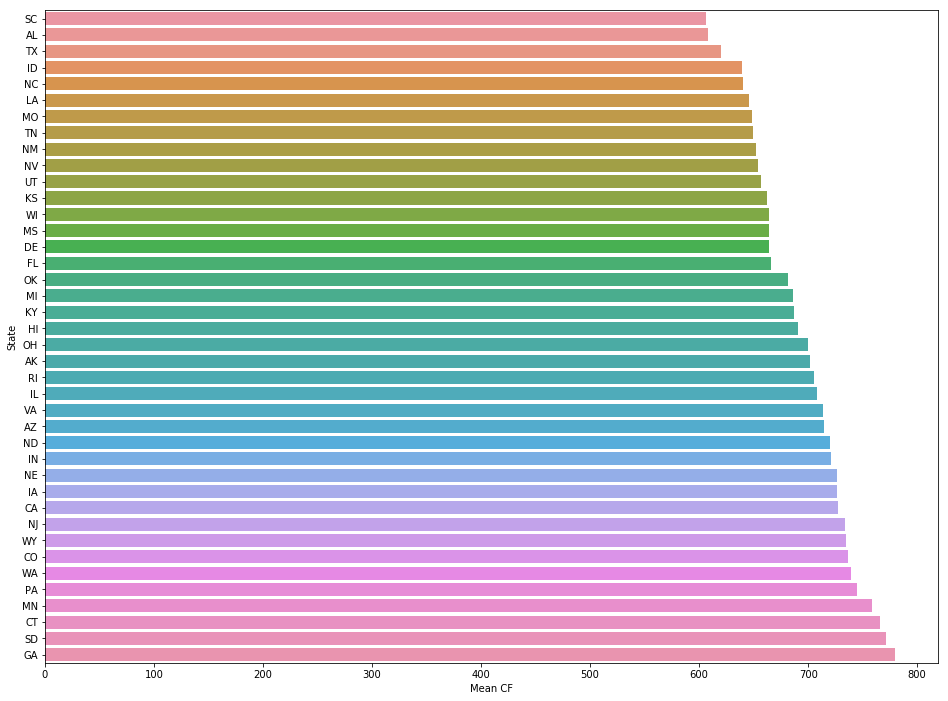

In [22]:
plt.figure(figsize=(16, 12))
sns.barplot(x='Mean CF', y='State', data=stateCF, orient='h');

From the horizontal bar plot, we can see that:
 - **South Carolina** and **Alabama** have the poorest mean loan quality
 - **South Dakota** and **Georgia** have the best mean loan quality

## Random Forest
Now, let's make a model for predicting CF score.

In [23]:
loanCF.head(10)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.00,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,879.0
1,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.00,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,New Loan,400.0,1364.87,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1,658.0
2,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
3,LL-I-17491287,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-02-21T17:20:23.671000,True,2017-02-21T17:45:11.088000,3.0,True,1,Paid Off Loan,1250.0,3112.16,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
4,LL-I-15679301,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-01-18T01:16:24.941000,True,2017-01-18T01:30:16.712000,1.0,True,1,Paid Off Loan,500.0,1292.09,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
5,LL-I-12500318,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2016-12-05T06:19:59.756000,True,2016-12-05T06:45:04.331000,0.0,True,1,Paid Off Loan,500.0,1271.81,MO,bvMandatory,6,Checked,58450a15e4b0bb9d6d7344c7,1,835.0
6,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.00,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,624.0
7,LL-I-18309774,10cefd11d41612b032fd9cd2debe32dc,B,159.00,2017-03-13T03:55:39.599000,True,2017-03-13T21:15:16.293000,1.0,True,1,New Loan,2600.0,8116.01,CA,organic,0,Checked,578f9346e4b0810ad5e7b72e,1,624.0
8,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.10,2016-05-25T03:05:18.849000,True,2016-05-25T15:11:36.260000,3.0,True,1,Paid Off Loan,300.0,422.64,WI,organic,0,Checked,56621584e4b0100e84141586,1,770.0
9,LL-I-10219067,1d249e27292d25e4d3b4bc142a2a4aea,W,381.65,2016-07-08T16:31:13.341000,True,2016-07-08T21:28:07.169000,4.0,True,1,Paid Off Loan,350.0,492.90,WI,organic,0,Checked,56621584e4b0100e84141586,1,770.0


In [24]:
#Converting boolean to binary to better look at description
loanCF = loanCF.applymap(lambda x: 1 if x == True else x)
loanCF = loanCF.applymap(lambda x: 0 if x == False else x)

loanCF.describe()

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,clearfraudscore
count,36194.000000,36211.000000,36209.000000,36211.000000,36211.000000,36194.000000,36211.000000,36211.000000,36211.0,36211.000000
mean,530.956717,0.894121,0.226325,0.889371,0.886140,663.510050,1812.447208,13.433239,1.0,687.436552
std,128.244217,0.307687,0.685858,0.313677,0.317646,507.249405,1377.650768,21.718126,0.0,127.031358
min,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1.0,122.000000
25%,449.000000,1.000000,0.000000,1.000000,1.000000,400.000000,1064.180000,3.000000,1.0,596.000000
50%,590.000000,1.000000,0.000000,1.000000,1.000000,500.000000,1407.040000,6.000000,1.0,696.000000
75%,625.000000,1.000000,0.000000,1.000000,1.000000,700.000000,2042.445000,25.000000,1.0,787.000000
max,681.000000,1.000000,20.000000,1.000000,1.000000,4687.500000,19963.630000,200.000000,1.0,965.000000


In [25]:
loanCF.isna().sum()

loanId                                 7
anon_ssn                               0
payFrequency                         103
apr                                   17
applicationDate                        0
originated                             0
originatedDate                      3831
nPaidOff                               2
approved                               0
isFunded                               0
loanStatus                            11
loanAmount                            17
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                            3850
clarityFraudId                         0
hasCF                                  0
clearfraudscore                        0
dtype: int64

Checking for data with null values and decide on what to do with them.

In [26]:
loanCF[loanCF['loanId'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
207,NaN,8e375a5af54d37e3c0f7088cefbc761e,NaN,NaN,2017-03-01T06:06:13.566000,0,NaN,2.0,0,0,NaN,NaN,0.0,NC,organic,0,No Payments,57c739bfe4b092499889e5a1,1,593.0
960,NaN,d4de70753c299e64204d8e308ee8f758,B,NaN,2016-04-23T15:08:19.533000,0,NaN,1.0,0,0,NaN,NaN,0.0,MI,lead,6,No Schedule,563ba3c8e4b07887b41b10d7,1,431.0
5178,NaN,cfc383e05575b0eefef1cc65c4c872e7,B,NaN,2016-01-29T13:58:18.300000,0,NaN,1.0,0,0,NaN,NaN,0.0,IL,lead,40,No Schedule,55c41822e4b0cebb07725925,1,726.0
7374,NaN,093c442176e2ed7ec6d5d6e26db371c5,NaN,NaN,2016-04-22T05:09:13.796000,0,NaN,1.0,0,0,NaN,NaN,0.0,IL,organic,0,No Schedule,562c01bbe4b0b681bd23d324,1,743.0
9035,NaN,05b074936d831fa09d602b6746a421d5,B,NaN,2016-11-29T15:03:39.910000,0,NaN,2.0,0,0,NaN,NaN,0.0,IN,lead,6,No Payments,57ed8c0be4b0b41b50d85f75,1,634.0
18317,NaN,80776a480c645ae50e43d5438ba92b0f,NaN,NaN,2016-04-14T19:25:07.016000,0,NaN,1.0,0,0,NaN,NaN,0.0,NC,organic,0,No Schedule,56300acae4b0ad375d01846b,1,756.0
25751,NaN,87e47b73cca0eacc065d115938aa976d,M,NaN,2015-12-17T17:25:27.518000,0,NaN,1.0,0,0,NaN,NaN,0.0,OH,organic,0,No Schedule,55f88975e4b005f2fd90ad05,1,550.0


In [27]:
loanCF[loanCF['apr'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
207,NaN,8e375a5af54d37e3c0f7088cefbc761e,NaN,NaN,2017-03-01T06:06:13.566000,0,NaN,2.0,0,0,NaN,NaN,0.0,NC,organic,0,No Payments,57c739bfe4b092499889e5a1,1,593.0
960,NaN,d4de70753c299e64204d8e308ee8f758,B,NaN,2016-04-23T15:08:19.533000,0,NaN,1.0,0,0,NaN,NaN,0.0,MI,lead,6,No Schedule,563ba3c8e4b07887b41b10d7,1,431.0
2984,LL-I-06011639,5a6053102515a514b5361ec8aa819a78,B,NaN,2015-12-22T20:04:45.515000,0,NaN,0.0,0,0,Withdrawn Application,NaN,0.0,IN,lead,40,No Schedule,55a9b057e4b0130b1548905c,1,794.0
3827,LL-I-06235607,31ce5327bd5cb337556ada91764be21f,B,NaN,2016-01-04T02:40:54.503000,0,NaN,1.0,0,0,Withdrawn Application,NaN,0.0,OH,bvMandatory,6,No Schedule,56070b1ce4b0c02f32742831,1,820.0
5178,NaN,cfc383e05575b0eefef1cc65c4c872e7,B,NaN,2016-01-29T13:58:18.300000,0,NaN,1.0,0,0,NaN,NaN,0.0,IL,lead,40,No Schedule,55c41822e4b0cebb07725925,1,726.0
7374,NaN,093c442176e2ed7ec6d5d6e26db371c5,NaN,NaN,2016-04-22T05:09:13.796000,0,NaN,1.0,0,0,NaN,NaN,0.0,IL,organic,0,No Schedule,562c01bbe4b0b681bd23d324,1,743.0
8122,LL-I-04839165,393dbd4e2649e74c413b7b9042d7c715,B,NaN,2015-11-20T18:50:05.561000,0,NaN,0.0,0,0,Withdrawn Application,NaN,0.0,OH,lead,100,No Schedule,54d15e8ce4b0a47f00efe0a7,1,894.0
9035,NaN,05b074936d831fa09d602b6746a421d5,B,NaN,2016-11-29T15:03:39.910000,0,NaN,2.0,0,0,NaN,NaN,0.0,IN,lead,6,No Payments,57ed8c0be4b0b41b50d85f75,1,634.0
10619,LL-I-05800763,614d12b60e60b9ebe150a9246ff572ce,I,NaN,2015-12-16T17:16:08.648000,0,NaN,1.0,0,0,Rejected,NaN,0.0,WI,bvMandatory,3,No Schedule,56719d4fe4b08b757a459346,1,491.0
13695,LL-I-05610118,2158fa75bd4672b28d2ecbfd506458fe,B,NaN,2015-12-11T17:48:20.375000,0,NaN,0.0,0,0,Withdrawn Application,NaN,0.0,IN,lead,75,No Schedule,559df03be4b08bf826be5bcf,1,835.0


In [28]:
loanCF[loanCF['nPaidOff'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
1944,LL-I-00002148,2b2951c8841c4737159133b21256e398,B,442.89,2014-12-03T15:36:04.144000,1,2014-12-03T19:51:18.918000,NaN,1,1,External Collection,1000.0,2408.88,OH,lead,25,Checked,56cdc263e4b05b76b3c77cd8,1,840.0
22017,LP-I-00000030,52166b67e3d299a8a9239b31a8af9a7b,B,29.99,2015-10-05T13:07:49.995000,1,2015-10-07T12:57:25.592000,NaN,1,1,Paid Off Loan,1040.0,1120.22,WA,lionpay,0,Checked,5615346ce4b0fcaaf03e50a1,1,862.0


In [29]:
loanCF[loanCF['loanStatus'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
207,NaN,8e375a5af54d37e3c0f7088cefbc761e,NaN,NaN,2017-03-01T06:06:13.566000,0,NaN,2.0,0,0,NaN,NaN,0.00,NC,organic,0,No Payments,57c739bfe4b092499889e5a1,1,593.0
960,NaN,d4de70753c299e64204d8e308ee8f758,B,NaN,2016-04-23T15:08:19.533000,0,NaN,1.0,0,0,NaN,NaN,0.00,MI,lead,6,No Schedule,563ba3c8e4b07887b41b10d7,1,431.0
5178,NaN,cfc383e05575b0eefef1cc65c4c872e7,B,NaN,2016-01-29T13:58:18.300000,0,NaN,1.0,0,0,NaN,NaN,0.00,IL,lead,40,No Schedule,55c41822e4b0cebb07725925,1,726.0
5292,LL-I-14843938,7b180a16408d2dee8370fbbe80bfe302,B,645.0,2017-01-11T18:09:35.203000,0,NaN,0.0,0,0,NaN,300.0,1036.88,PA,lead,25,NaN,587674dce4b08f247d76d28b,1,760.0
7374,NaN,093c442176e2ed7ec6d5d6e26db371c5,NaN,NaN,2016-04-22T05:09:13.796000,0,NaN,1.0,0,0,NaN,NaN,0.00,IL,organic,0,No Schedule,562c01bbe4b0b681bd23d324,1,743.0
9035,NaN,05b074936d831fa09d602b6746a421d5,B,NaN,2016-11-29T15:03:39.910000,0,NaN,2.0,0,0,NaN,NaN,0.00,IN,lead,6,No Payments,57ed8c0be4b0b41b50d85f75,1,634.0
16456,LL-I-10832873,15fd5cc0b5f812b397c346d79600929d,B,360.0,2016-08-05T02:58:32.792000,0,NaN,0.0,0,0,NaN,900.0,1932.09,IL,lead,45,NaN,57a400d3e4b0d05030865d19,1,781.0
18317,NaN,80776a480c645ae50e43d5438ba92b0f,NaN,NaN,2016-04-14T19:25:07.016000,0,NaN,1.0,0,0,NaN,NaN,0.00,NC,organic,0,No Schedule,56300acae4b0ad375d01846b,1,756.0
18770,LL-I-13225472,5f595539c8aef2241a9f3344c10e74b3,B,645.0,2016-12-16T02:38:13.397000,0,NaN,0.0,0,0,NaN,500.0,1755.78,WA,lead,10,NaN,58535392e4b08f245ca9c646,1,851.0
25751,NaN,87e47b73cca0eacc065d115938aa976d,M,NaN,2015-12-17T17:25:27.518000,0,NaN,1.0,0,0,NaN,NaN,0.00,OH,organic,0,No Schedule,55f88975e4b005f2fd90ad05,1,550.0


In [30]:
loanCF[loanCF['loanAmount'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,clearfraudscore
207,NaN,8e375a5af54d37e3c0f7088cefbc761e,NaN,NaN,2017-03-01T06:06:13.566000,0,NaN,2.0,0,0,NaN,NaN,0.0,NC,organic,0,No Payments,57c739bfe4b092499889e5a1,1,593.0
960,NaN,d4de70753c299e64204d8e308ee8f758,B,NaN,2016-04-23T15:08:19.533000,0,NaN,1.0,0,0,NaN,NaN,0.0,MI,lead,6,No Schedule,563ba3c8e4b07887b41b10d7,1,431.0
2984,LL-I-06011639,5a6053102515a514b5361ec8aa819a78,B,NaN,2015-12-22T20:04:45.515000,0,NaN,0.0,0,0,Withdrawn Application,NaN,0.0,IN,lead,40,No Schedule,55a9b057e4b0130b1548905c,1,794.0
3827,LL-I-06235607,31ce5327bd5cb337556ada91764be21f,B,NaN,2016-01-04T02:40:54.503000,0,NaN,1.0,0,0,Withdrawn Application,NaN,0.0,OH,bvMandatory,6,No Schedule,56070b1ce4b0c02f32742831,1,820.0
5178,NaN,cfc383e05575b0eefef1cc65c4c872e7,B,NaN,2016-01-29T13:58:18.300000,0,NaN,1.0,0,0,NaN,NaN,0.0,IL,lead,40,No Schedule,55c41822e4b0cebb07725925,1,726.0
7374,NaN,093c442176e2ed7ec6d5d6e26db371c5,NaN,NaN,2016-04-22T05:09:13.796000,0,NaN,1.0,0,0,NaN,NaN,0.0,IL,organic,0,No Schedule,562c01bbe4b0b681bd23d324,1,743.0
8122,LL-I-04839165,393dbd4e2649e74c413b7b9042d7c715,B,NaN,2015-11-20T18:50:05.561000,0,NaN,0.0,0,0,Withdrawn Application,NaN,0.0,OH,lead,100,No Schedule,54d15e8ce4b0a47f00efe0a7,1,894.0
9035,NaN,05b074936d831fa09d602b6746a421d5,B,NaN,2016-11-29T15:03:39.910000,0,NaN,2.0,0,0,NaN,NaN,0.0,IN,lead,6,No Payments,57ed8c0be4b0b41b50d85f75,1,634.0
10619,LL-I-05800763,614d12b60e60b9ebe150a9246ff572ce,I,NaN,2015-12-16T17:16:08.648000,0,NaN,1.0,0,0,Rejected,NaN,0.0,WI,bvMandatory,3,No Schedule,56719d4fe4b08b757a459346,1,491.0
13695,LL-I-05610118,2158fa75bd4672b28d2ecbfd506458fe,B,NaN,2015-12-11T17:48:20.375000,0,NaN,0.0,0,0,Withdrawn Application,NaN,0.0,IN,lead,75,No Schedule,559df03be4b08bf826be5bcf,1,835.0


I think that null values in **loanId** should be left alone as it is only a unique identifier and does not affect the model's accuracy. Null **apr** rows should be removed as higher APR mean higher interest, thus higher default rate. Null **nPaidOff**  rows should be removed as well because I think that a person that could paid off previous loan are less likely to default loan payment. Null **loanAmount** rows should also be removed as higher loan amount are harder to paid off. Null **loanStatus** rows can be left alone as I think that it does not affect the model much.

In [31]:
loanCF = loanCF[loanCF['apr'].notnull()]
loanCF = loanCF[loanCF['nPaidOff'].notnull()]
loanCF = loanCF[loanCF['loanAmount'].notnull()]

loanCF.isna().sum()

loanId                                 0
anon_ssn                               0
payFrequency                         100
apr                                    0
applicationDate                        0
originated                             0
originatedDate                      3813
nPaidOff                               0
approved                               0
isFunded                               0
loanStatus                             4
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                            3850
clarityFraudId                         0
hasCF                                  0
clearfraudscore                        0
dtype: int64

In [32]:
for i in loanCF.columns:
    print(i, ":\n", loanCF[i].unique())

loanId :
 ['LL-I-06644937' 'LL-I-17826953' 'LL-I-16519347' ... 'LL-I-09897110'
 'LL-I-14178923' 'LL-I-13311312']
anon_ssn :
 ['464f5d9ae4fa09ece4048d949191865c' '7529d29c9d943cc55bc71a85d9c6b7a3'
 'bc9fa73468acf18cb968a3a6a3c4697c' ... '0538f828b4a0b44502ead5a8033ee779'
 'd9a63e9e15b862fcaaf3653c52e1f16c' '043dd86c24c63c8968082fa3ad7a8911']
payFrequency :
 ['B' 'W' 'S' 'M' 'I' nan]
apr :
 [199.     645.     490.     590.     159.     404.1    381.65   449.99
 315.     324.     601.     390.     625.     531.     359.     325.
 360.     516.25   680.     449.     681.     475.     441.     251.
 650.     501.5    341.25   525.     180.2    306.     217.     585.
 540.     442.89   600.      95.     568.75   404.991  478.67   550.
 427.5    510.     540.9    416.5    300.     562.5    208.     290.
 241.     139.125  225.     500.     288.     565.     552.5    240.
 194.     242.     531.25   355.     182.     239.     231.     546.875
 578.     382.4915 612.9    160.     400.     510.8

## Creating Train and Test Sets

In [33]:
#Labels are the values we want to predict
labels = np.array(loanCF['clearfraudscore'])

cleanLoanCF = loanCF

#Remove unimportant columns
importantCols = ['payFrequency','apr','originated','nPaidOff','approved','isFunded','loanStatus','loanAmount'
                 ,'originallyScheduledPaymentAmount','state','leadType','leadCost','fpStatus','clearfraudscore']
loanCF = loanCF[importantCols]

In [34]:
#One-hot encode categorical features
loanCF = pd.get_dummies(loanCF)
loanCF.head(5)

cleanLoanCF = loanCF

#Remove the labels from the dataset
loanCF = loanCF.drop('clearfraudscore', axis = 1)

#Saving column names for later use
loanCFLists = list(loanCF.columns)

In [35]:
loanCF.head(5)

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,payFrequency_B,payFrequency_I,...,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,fpStatus_Cancelled,fpStatus_Checked,fpStatus_No Payments,fpStatus_Pending,fpStatus_Rejected,fpStatus_Skipped
0,199.0,1,0.0,1,1,3000.0,6395.19,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,645.0,1,0.0,1,1,400.0,1364.87,40,0,0,...,0,0,0,0,0,1,0,0,0,0
2,490.0,1,2.0,1,1,1250.0,3313.78,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,490.0,1,3.0,1,1,1250.0,3112.16,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,490.0,1,1.0,1,1,500.0,1292.09,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
trainLoanCF, testLoanCF, trainLabels, testLabels = train_test_split(loanCF, labels, test_size = 0.25,
                                                                           random_state = 42)

In [37]:
print('Training LoanCF Shape:', trainLoanCF.shape)
print('Training Labels Shape:', trainLabels.shape)
print('Testing LoanCF Shape:', testLoanCF.shape)
print('Testing Labels Shape:', testLabels.shape)

Training LoanCF Shape: (27143, 84)
Training Labels Shape: (27143,)
Testing LoanCF Shape: (9048, 84)
Testing Labels Shape: (9048,)


## Train Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf.fit(trainLoanCF, trainLabels);

In [39]:
#Use the forest's predict method on the test data
predictions = rf.predict(testLoanCF)

#Calculate the absolute errors
errors = abs(predictions - testLabels)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 76.0


## Determine Performance Metrics

In [40]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / testLabels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.89 %.


# Interpreting Model Results

In [41]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]
#export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')

#graph.write_png('tree.png'); 

In [42]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 52


## Important Variables

In [43]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(loanCFLists, importances)]

#Sort variables according to its importance in descending
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: loanAmount           Importance: 0.23
Variable: originallyScheduledPaymentAmount Importance: 0.23
Variable: leadType_bvMandatory Importance: 0.11
Variable: leadCost             Importance: 0.05
Variable: apr                  Importance: 0.04
Variable: nPaidOff             Importance: 0.02
Variable: loanStatus_External Collection Importance: 0.02
Variable: loanStatus_Paid Off Loan Importance: 0.02
Variable: state_TX             Importance: 0.02
Variable: payFrequency_B       Importance: 0.01
Variable: payFrequency_I       Importance: 0.01
Variable: payFrequency_M       Importance: 0.01
Variable: payFrequency_S       Importance: 0.01
Variable: payFrequency_W       Importance: 0.01
Variable: loanStatus_Internal Collection Importance: 0.01
Variable: loanStatus_New Loan  Importance: 0.01
Variable: state_FL             Importance: 0.01
Variable: state_IN             Importance: 0.01
Variable: state_MI             Importance: 0.01
Variable: state_MO             Importance: 0.01
Vari

## New model with 6 most important variables

In [44]:
#New RF with only 6 most important variables
rfMostImportant = RandomForestRegressor(n_estimators= 1000, random_state=42)

#Extract the 6 most important features
importantIndices = [loanCFLists.index('loanAmount'), loanCFLists.index('originallyScheduledPaymentAmount'), 
                    loanCFLists.index('leadType_bvMandatory'), 
                    loanCFLists.index('leadCost'), loanCFLists.index('apr'), loanCFLists.index('nPaidOff')]
trainImportant = trainLoanCF.iloc[:, importantIndices]
testImportant = testLoanCF.iloc[:, importantIndices]

#Train the model
rfMostImportant.fit(trainImportant, trainLabels)

predictions = rfMostImportant.predict(testImportant)

errors = abs(predictions - testLabels)

print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / testLabels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 81.91
Accuracy: 86.98 %.


From this model, we know that we do not require all variables for accurate prediction. We only need to collect 6 variables and achieve nearly the same performance. But, we are still required to weigh the reduction in accuracy versus the extra time required to obtain more information.

## Extra insights
I am interested to look into the top 3 most important variables. Let's see if we can find any information.

In [45]:
loanAmt = cleanLoanCF.sort_values(['loanAmount'], ascending = False)
loanAmt = loanAmt[['loanAmount','clearfraudscore']]
display(loanAmt)

,loanAmount,clearfraudscore
12418,4687.5,820.0
12419,4687.0,820.0
1098,4687.0,830.0
1100,4687.0,830.0
9763,4687.0,783.0
9761,4687.0,783.0
495,4375.0,902.0
29528,4000.0,837.0
9513,4000.0,893.0
17953,4000.0,856.0


It seems like most of the applicants with higher loan amount are less likely to default. It might be due to that many people thought MoneyLion will leave them alone because their loan amount is not worth the trouble for MoneyLion to take action against them.

In [46]:
loanAmtSch = cleanLoanCF.sort_values(['originallyScheduledPaymentAmount'], ascending = False)
loanAmtSch = loanAmtSch[['originallyScheduledPaymentAmount','clearfraudscore']]
display(loanAmtSch)

,originallyScheduledPaymentAmount,clearfraudscore
6712,19963.63,801.0
17019,16868.15,752.0
16974,16800.12,744.0
12419,15092.20,820.0
1225,14728.80,883.0
1223,14707.42,883.0
1100,14600.82,830.0
1098,14595.66,830.0
1222,14401.35,883.0
20554,14286.97,816.0


Same explanations as above.

In [47]:
leadType_bvMandatory = cleanLoanCF.sort_values(['clearfraudscore'], ascending = False)
leadType_bvMandatory = leadType_bvMandatory[['leadType_bvMandatory','clearfraudscore']]
display(leadType_bvMandatory)

,leadType_bvMandatory,clearfraudscore
22649,0,965.0
18930,0,965.0
29019,0,963.0
9047,0,963.0
8391,0,962.0
33819,0,962.0
34859,0,961.0
27048,0,961.0
22817,0,961.0
28189,0,960.0


At first glance it seems like most of the lead bought from ping tree have lower CF score -- most likely to default. But let's take a deeper look.

In [48]:
leadType_bvMandatory.groupby('leadType_bvMandatory').clearfraudscore.mean()

leadType_bvMandatory
0    733.351472
1    627.707060
Name: clearfraudscore, dtype: float64

It seems like it is not too far off compared to other lead types

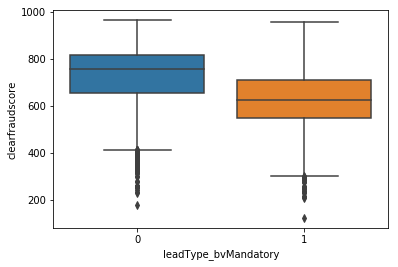

In [49]:
ax = sns.boxplot(x="leadType_bvMandatory", y="clearfraudscore", data=leadType_bvMandatory)


In [50]:
Q1 = cleanLoanCF['clearfraudscore'].quantile(0.25)
Q3 = cleanLoanCF['clearfraudscore'].quantile(0.75)
IQR = Q3 - Q1

outNum = ((cleanLoanCF['clearfraudscore'] < (Q1 - 1.5 * IQR)) | (cleanLoanCF['clearfraudscore'] > (Q3 + 1.5 * IQR))).sum()
leadType_bvMandatory = leadType_bvMandatory[~(leadType_bvMandatory['clearfraudscore'] < (Q1 - 1.5 * IQR))]
leadType_bvMandatory = leadType_bvMandatory[~(leadType_bvMandatory['clearfraudscore'] > (Q3 + 1.5 * IQR))]  

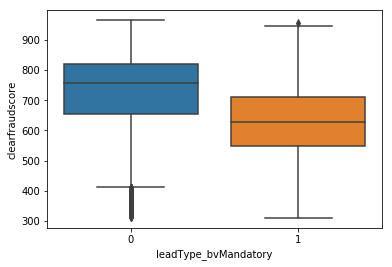

In [51]:
ax = sns.boxplot(x="leadType_bvMandatory", y="clearfraudscore", data=leadType_bvMandatory)

In [52]:
leadType_bvMandatory.groupby('leadType_bvMandatory').clearfraudscore.mean()

leadType_bvMandatory
0    733.725952
1    628.403833
Name: clearfraudscore, dtype: float64

The results are more or less the same even though extreme outliers are removed.

From this insight, I recommend that MoneyLion **stop buying new leads from this specific ping tree**.

## Time taken
 - Explore & understanding data ~ 4 hours
 - Data Preprocessing ~ 8 hours
 - Modeling ~ 2 hours
 - ***Total Time ~ 14 hours***